Racial bias is a key concern regarding the development, validation, and implementation of machine learning (ML) models in clinical settings.
There are number of ways defined by which we can mitigate the bias, the approach that we have used is:

    1. In the pre-processing, we can re-sample the existing data and incorporate new data that contains examples of all the skin tones and not only just one.


The obstacle that we had to do the above task is the unavailability of the dataset containing darker skin-tones. We had the images of the skin-disease that contain only the fair skin-toned images and those dataset was also very limited. In order to generate more dataset with darker skin tones and more in number, I have done another project in which I am using the computer vision techniques to change the skin tone of the images while keeping the texture of the images intact, which was important forour task because we only want the skin tone of the images to change while the diseases should remain the same. The script __init__ provided in the other project is used to change the colour of the skin tone. By giving the input images and the RGB value of the darker skin tone that we want in the results, we get the desired skin tone in the output images while keeping the disease area as the same. Following is the example of some of the input images and their output with darker skin tone.

This project is about the multi-class classification of skin-disease dataset. The dataset has 9 diseases/classes that we have to predict. The aim of this project is to detect the bias in the machine learning models. Because our dataset contains only fair skin images. I have taken around 1000 images of each class thus having a total data of about 10k images of our dataset. The model is trained and is used to test the images to detect the type of skin-disease. The test data has a total accuracy of 91.03 % for fair skin images while as for the dark-skin,the test accuracy is 22.72 % for the same skin diseases. Thus making it clear that our model is biased to darker skin-tones.

In order to remove this bias, I have taken the images of the darker skin tone(generated from the other project) and incorporated then in my dataset. I have added the darker images in each disease data. About 1000 fair skin and 1000 dark-skin images of each skin disease class was taken thus, the total input datais approx 18k. The same RESNET model is trained  for 50 epochs and the test accuracy of both the fair and dark skin tone images was calculated. The fair skin images had the total test accuracy of 90.29% for the fair skin tone images and 84.22% for the dark skin images. Hence, for the machine learning model to be un-biased, we need to train the model with all sort of data so that it can learn the task efficiently and effectively.




In [10]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import imageio
from torch.optim import lr_scheduler



In [11]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [12]:
# Specify transforms using torchvision.transforms as transforms library
transformations = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

In [13]:
# Split the data into training, validation and datasets
import splitfolders
import os

path = 'mix-data'
print(os.listdir(path))
splitfolders.ratio(path, output="mix_data_split", seed=1337, ratio=(.6, .2, .2))

['esantema-maculo-papuloso', 'scabbia', 'varicella', 'esantema-virale', 'esantema-morbilliforme', 'pediculosi', 'orticaria', 'esantema-polimorfo-like', 'esantema-iatrogeno-farmaco-indotta']


In [14]:
train_set_mix = datasets.ImageFolder("mix_data_split/train", transform=transformations)
val_set_mix = datasets.ImageFolder("mix_data_split/val", transform=transformations)
test_set_mix = datasets.ImageFolder("mix_data_split/test", transform=transformations)

In [15]:

print(len(train_set_mix))
print(len(val_set_mix))
print(len(test_set_mix))

11065
3685
7392


In [16]:
class_names  = train_set_mix.classes
class_names

['esantema-iatrogeno-farmaco-indotta',
 'esantema-maculo-papuloso',
 'esantema-morbilliforme',
 'esantema-polimorfo-like',
 'esantema-virale',
 'orticaria',
 'pediculosi',
 'scabbia',
 'varicella']

In [17]:
train_loader_mix = torch.utils.data.DataLoader(train_set_mix, batch_size=16, shuffle=True)
val_loader_mix = torch.utils.data.DataLoader(val_set_mix, batch_size =16, shuffle=True)
test_loader_mix = torch.utils.data.DataLoader(test_set_mix, batch_size =16, shuffle=True)

In [18]:
# get some random training images
dataiter = iter(train_loader_mix)
images, labels = next(dataiter)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


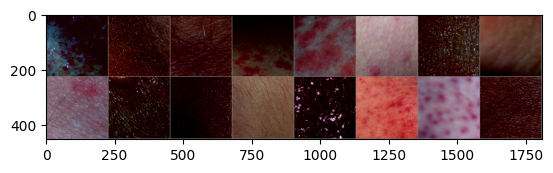

In [19]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
imshow(torchvision.utils.make_grid(images))

In [20]:
model = models.resnet50(weights='ResNet50_Weights.IMAGENET1K_V1')
model.to(device)
#Using the pretrained model we Dont Train the initial layers.
for param in model.parameters():
    param.requires_grad = False #Set True to train the whole network
# Creating final fully connected Layer that accorting to the no of classes we require
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, len(class_names)),
                                 nn.LogSoftmax(dim=1))
model.to(device)
    

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

# variable learning rate for different layers and usingg cosine annealing warm restarts
optimizer = optim.SGD([
        {'params': model.conv1.parameters(), 'lr':1e-4},
        {'params': model.layer1.parameters(), 'lr':1e-4},
        {'params': model.layer2.parameters(),'lr':1e-4},
        {'params': model.layer3.parameters(),'lr':1e-3},
        {'params': model.layer4.parameters() ,'lr':1e-3},
        {'params': model.fc.parameters(), 'lr': 1e-2}   # the classifier needs to learn weights faster
    ], lr=0.001, weight_decay=0.0005)

# Restarts the learning rate after every 5 epoch
scheduler = lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, 
        T_0= 5, 
        T_mult= 1,
    )

In [23]:
epochs = 50
best_acc = 0.0
iters = len(train_loader_mix)
patience = 5
best_val_loss = np.Inf

train_loss, val_loss = [], []
print("-----starting training--------")
for epoch in range (epochs):
    train_loss_epoch = 0.0
    valid_loss_epoch = 0.0
    accuracy = 0.0

    # Trainin_the_ model
    model.train()
    
    for i, sample in enumerate (train_loader_mix):
        inputs, labels = sample
        # Move data to GPU
        inputs, labels = inputs.to(device), labels.to(device)
        # Clear Optimizers
        optimizer.zero_grad()
        # Forward Pass
        logps = model.forward(inputs)
        # Loss
        loss = criterion(logps, labels)
        # Backprop (Calculate Gradients)
        loss.backward()
        # Adjust parameters based on gradients
        optimizer.step()
        scheduler.step(epoch + i / iters) # if using cosine annealing warm restarts
        # Add the loss to the  running loss
        train_loss_epoch += loss.item() * inputs.size(0)
    
    # Update the learning rate scheduler
    #scheduler.step()

    # Validation
    model.eval ()
    correct_predictions = 0
    total_samples = 0
    # Tell torch not to calculate gradients
    with torch.no_grad ():
        for inputs, labels in val_loader_mix:
            # Move to device
            inputs, labels = inputs.to (device), labels.to(device)
            # Forward pass
            output = model.forward(inputs)
            # Calculate Loss
            val_loss_batch = criterion(output, labels)
            # Add loss to the validation set's running loss
            valid_loss_epoch += val_loss_batch.item() * inputs.size(0)

            # Since our model outputs a LogSoftmax, find the real
            _, predicted = torch.max(output, 1)
            correct_predictions += torch.sum(predicted == labels).item()
            total_samples += labels.size(0)
        accuracy = correct_predictions / total_samples


    # Early Stopping
    if valid_loss_epoch < best_val_loss:
        best_val_loss = valid_loss_epoch
        patience_counter = 0
        torch.save(model.state_dict(), 'best_model_white_adam.pth')
    else:
        patience_counter -= 1
        if patience_counter == 0:
            print('Early stopping')
            break


   
    # Get the average loss for the  epoch
    train_loss_epoch /= len(train_loader_mix.dataset)
    valid_loss_epoch /= len(val_loader_mix.dataset)

    # Append the loss and accuracy
    train_loss.append(train_loss_epoch)
    val_loss.append(valid_loss_epoch)

    # Print out the information
    print(f'Epoch {epoch + 1},'
          f' Training Loss: {train_loss_epoch:.6f},'
          f' Validation Loss: {valid_loss_epoch:.6f},'
          f' Accuracy: {accuracy:.6f}'
    )


# Plotting the training and validation loss
plt.plot(range(1, epochs+1), train_loss, label='Training loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#print(f'Best Validation Accuracy: {best_acc:.6f}')

-----starting training--------
Epoch 1, Training Loss: 1.756467, Validation Loss: 1.405309, Accuracy: 0.520488
Epoch 2, Training Loss: 1.376077, Validation Loss: 1.194406, Accuracy: 0.598643
Epoch 3, Training Loss: 1.262409, Validation Loss: 1.099058, Accuracy: 0.631750


KeyboardInterrupt: 

In [ ]:
# SEPERATE TEST SET OF WHITE AND DARK IMAGES AND TEST THEM SEPERATELY
test_set_dark = datasets.ImageFolder("mix_data_split/test/testDark", transform=transformations)
test_loader_dark = torch.utils.data.DataLoader(test_set_dark, batch_size =16, shuffle=True)

test_set_white = datasets.ImageFolder("mix_data_split/test/testWhite", transform=transformations)
test_loader_white = torch.utils.data.DataLoader(test_set_white, batch_size =16, shuffle=True)

# TESTING THE 2 MODELS WITH TWO DIFFERENT DATASETS.
ONE MODEL IS TRAINED WITH THE IMAGES THAT ONLY HAVE WHITE SKIN TONE. WHILE OTHER MODEL WAS TRAINED CONTAINING DIFFERENT SKIN TONES.

Test Accuracy: 0.9103


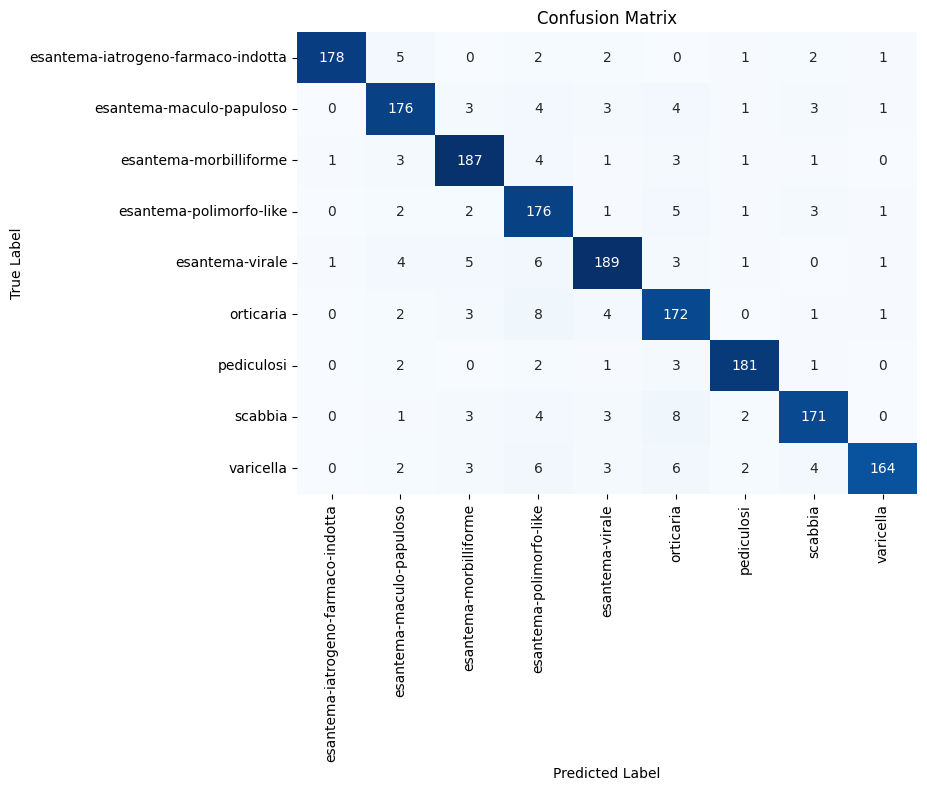

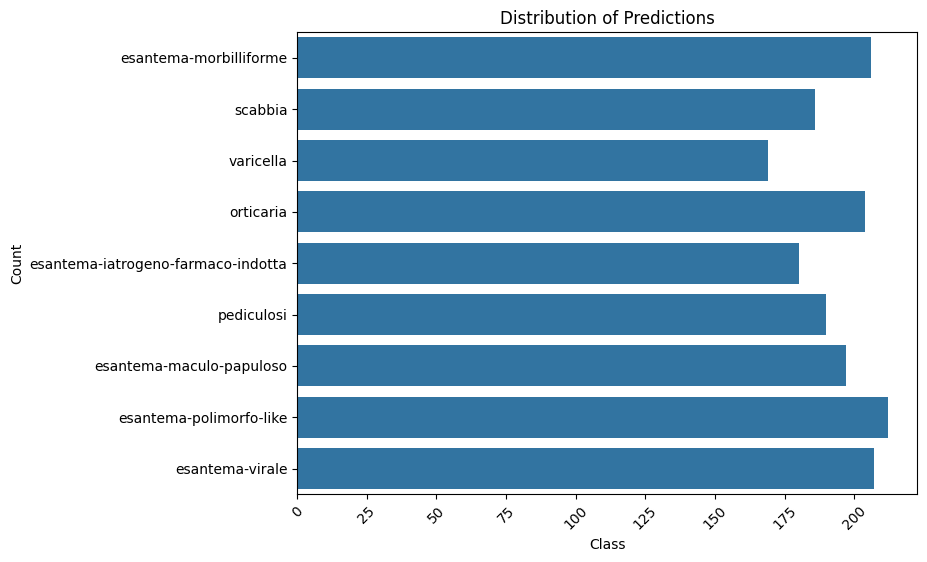

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained the model and saved it as 'best_model.pth'

# Load the trained model
model.load_state_dict(torch.load('best_model_white_data.pth'))
model.eval()  # Set the model to evaluation mode

# Define other necessary variables (test_loader, device, etc.)

# Get class names from the dataset
class_names = test_loader_white.dataset.classes

# Initialize variables for evaluation metrics
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader_white:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update evaluation metrics
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        # Collect predicted and true labels for visualization
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = total_correct / total_samples

# Print accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot([class_names[pred] for pred in predicted_labels])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.xticks(rotation=45)
plt.show()


Test Accuracy: 0.2272


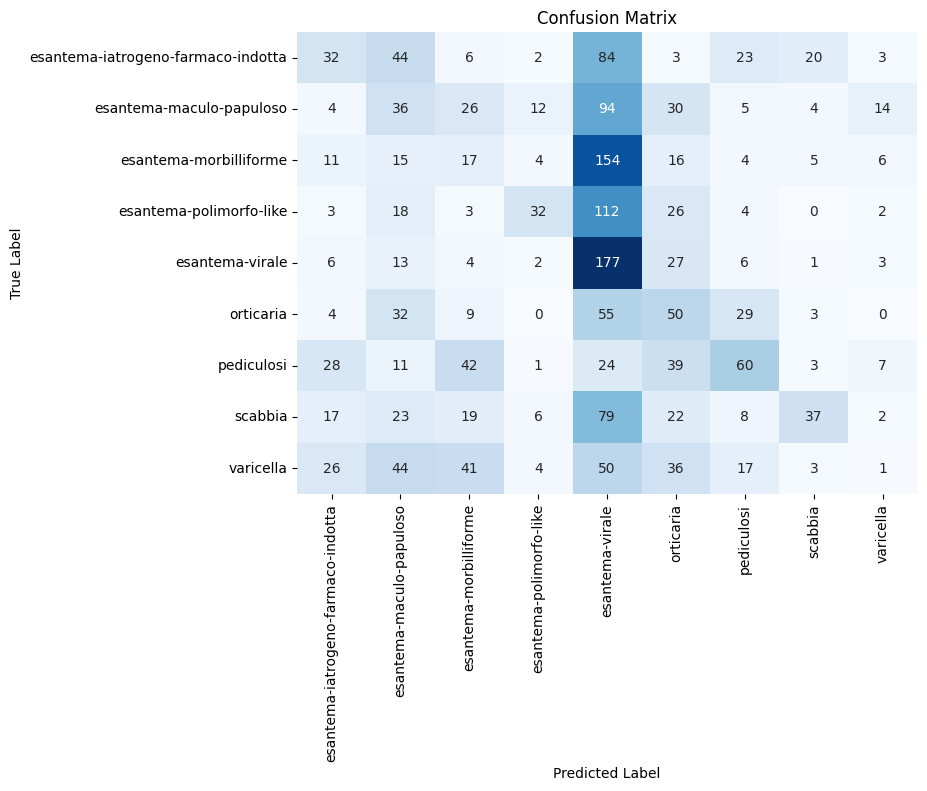

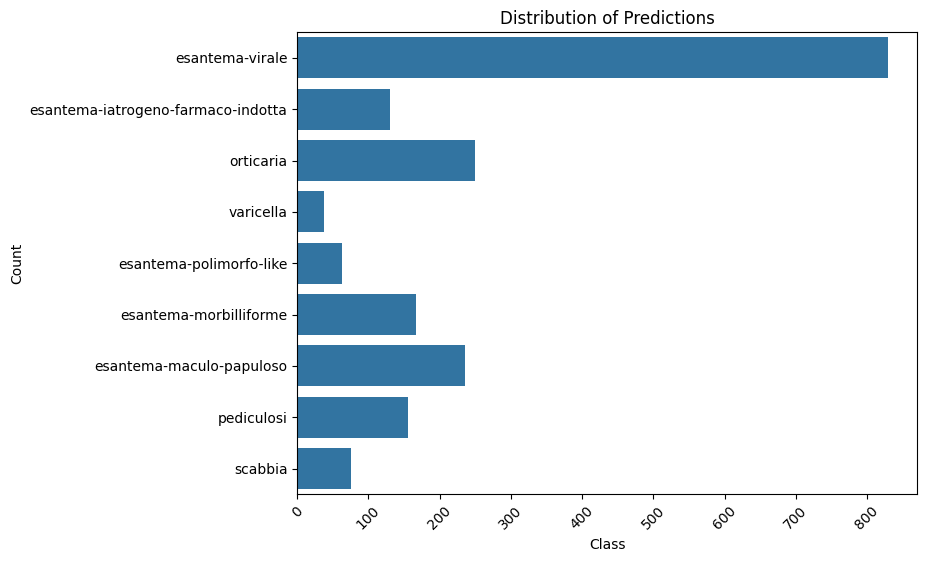

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained the model and saved it as 'best_model.pth'

# Load the trained model
model.load_state_dict(torch.load('best_model_white_data.pth'))
model.eval()  # Set the model to evaluation mode

# Define other necessary variables (test_loader, device, etc.)

# Get class names from the dataset
class_names = test_loader_dark.dataset.classes

# Initialize variables for evaluation metrics
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader_dark:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update evaluation metrics
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        # Collect predicted and true labels for visualization
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = total_correct / total_samples

# Print accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot([class_names[pred] for pred in predicted_labels])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.xticks(rotation=45)
plt.show()


Test Accuracy: 0.9029


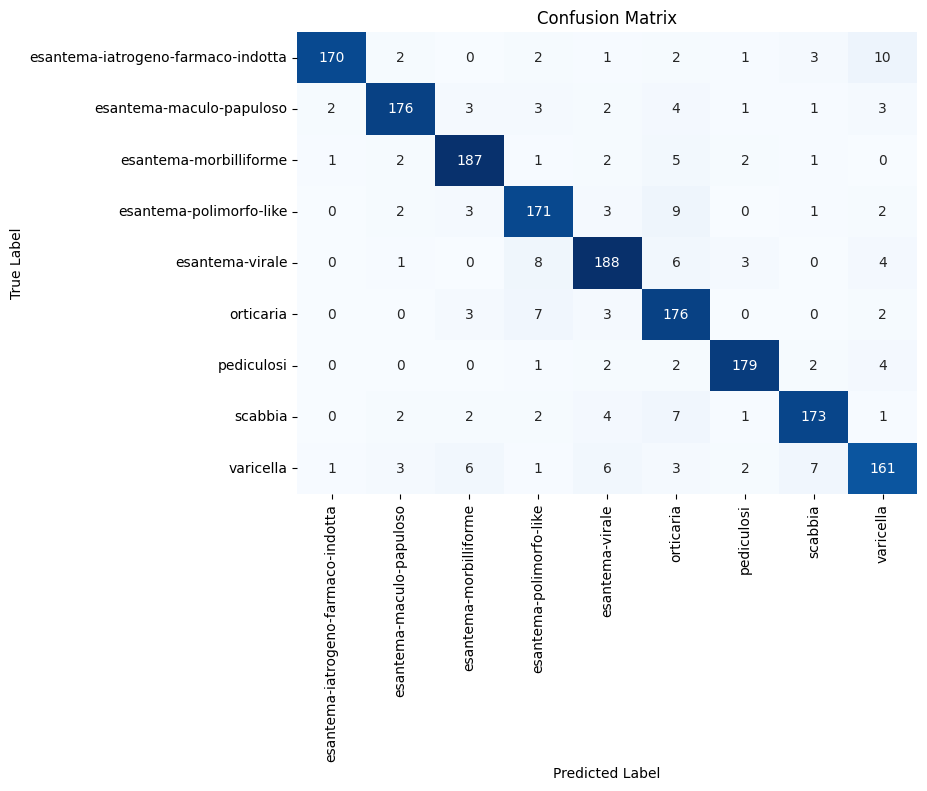

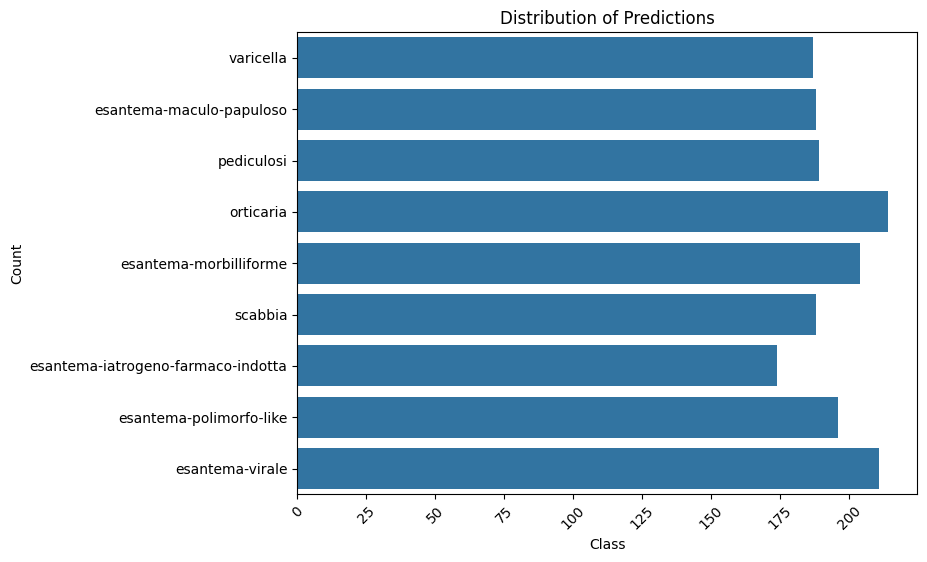

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained the model and saved it as 'best_model.pth'

# Load the trained model
model.load_state_dict(torch.load('best_model_mix_data.pth'))
model.eval()  # Set the model to evaluation mode

# Define other necessary variables (test_loader, device, etc.)

# Get class names from the dataset
class_names = test_loader_white.dataset.classes

# Initialize variables for evaluation metrics
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader_white:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update evaluation metrics
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        # Collect predicted and true labels for visualization
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = total_correct / total_samples

# Print accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot([class_names[pred] for pred in predicted_labels])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.xticks(rotation=45)
plt.show()


Test Accuracy: 0.8422


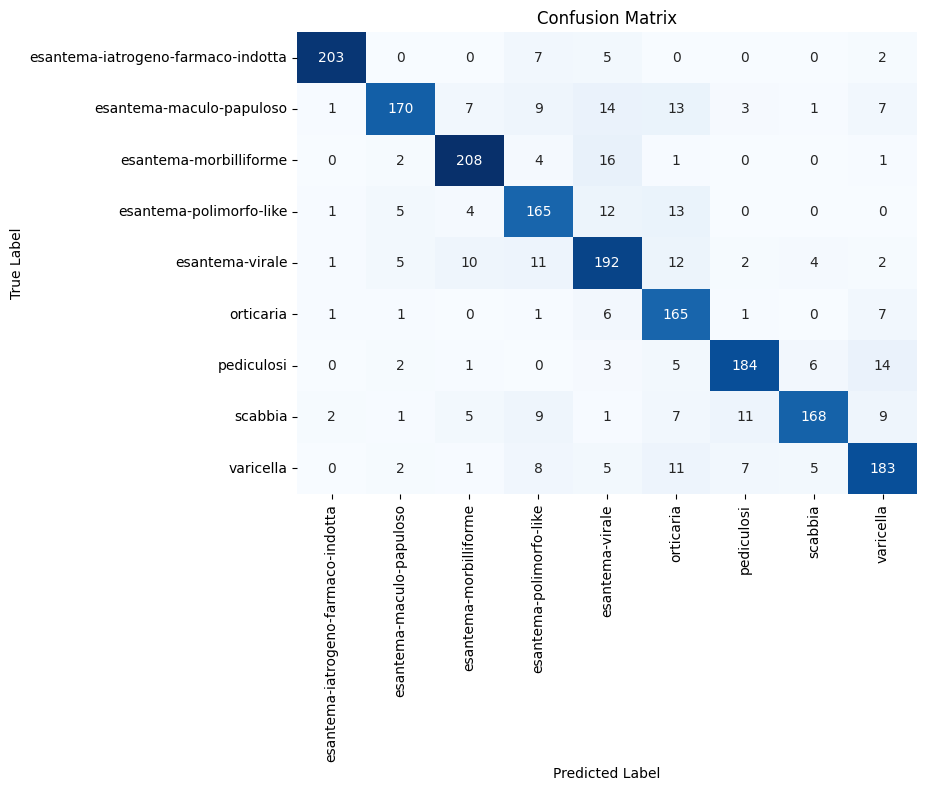

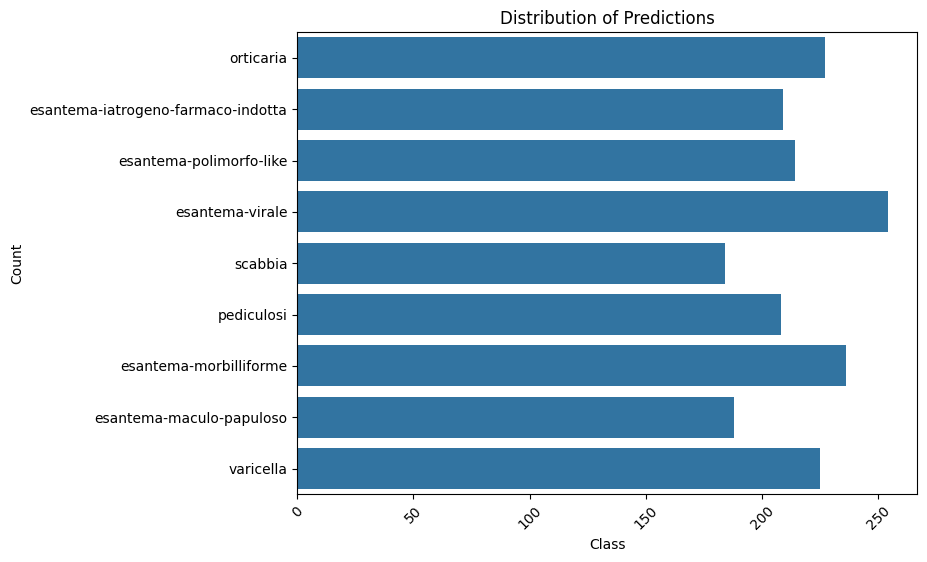

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have trained the model and saved it as 'best_model.pth'

# Load the trained model
model.load_state_dict(torch.load('best_model_mix_data.pth'))
model.eval()  # Set the model to evaluation mode

# Define other necessary variables (test_loader, device, etc.)

# Get class names from the dataset
class_names = test_loader_dark.dataset.classes

# Initialize variables for evaluation metrics
total_correct = 0
total_samples = 0
predicted_labels = []
true_labels = []

# Iterate over the test dataset
with torch.no_grad():
    for inputs, labels in test_loader_dark:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        
        # Get predictions
        _, predicted = torch.max(outputs, 1)
        
        # Update evaluation metrics
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        # Collect predicted and true labels for visualization
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = total_correct / total_samples

# Print accuracy
print(f'Test Accuracy: {accuracy:.4f}')

# Plot confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot distribution of predictions
plt.figure(figsize=(8, 6))
sns.countplot([class_names[pred] for pred in predicted_labels])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Predictions')
plt.xticks(rotation=45)
plt.show()
